# Geometry sources:

Countries: https://github.com/datasets/geo-countries

US States: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

Global regions/provinces/states: http://www.diva-gis.org/gdata

In [364]:
import pandas as pd
import geopandas as gpd
from unidecode import unidecode

In [365]:
lookupTable = pd.read_csv('UID_ISO_FIPS_LookUp_Table.csv')

In [366]:
cleanLookup = lookupTable[(lookupTable.FIPS < 79)|(lookupTable.FIPS.isnull())]
uniqueCountries = cleanLookup['Country_Region'].unique()

for country in uniqueCountries:
    if (len(cleanLookup[cleanLookup['Country_Region']==country])==1):
        pass
    elif (len(cleanLookup[(cleanLookup['Country_Region']==country)&(cleanLookup['Province_State'].isnull())])==1):
        if (country == "France") or (country == "Denmark"):
            pass
        else:
            cleanLookup.drop(cleanLookup.loc[(cleanLookup['Country_Region']==country)&(cleanLookup['Province_State'].isnull())].index, inplace=True)
    

C:\Users\halpe\anaconda3\envs\trees\lib\site-packages\pandas\core\frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [367]:
cleanLookup[cleanLookup['Province_State'].isnull()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4.0,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8.0,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,12.0,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
3,20.0,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
4,24.0,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.202700,17.873900,Angola,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
703,275.0,PS,PSE,275.0,NaN,NaN,NaN,West Bank and Gaza,31.952200,35.233200,West Bank and Gaza,5101416.0
704,732.0,EH,ESH,732.0,NaN,NaN,NaN,Western Sahara,24.215500,-12.885800,Western Sahara,597330.0
705,887.0,YE,YEM,887.0,NaN,NaN,NaN,Yemen,15.552727,48.516388,Yemen,29825968.0
706,894.0,ZM,ZMB,894.0,NaN,NaN,NaN,Zambia,-13.133897,27.849332,Zambia,18383956.0


# Merge Geometries for Countries

In [368]:
countries = gpd.read_file('countries.geojson')

In [369]:
countries.head()

,ADMIN,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."


<AxesSubplot:>

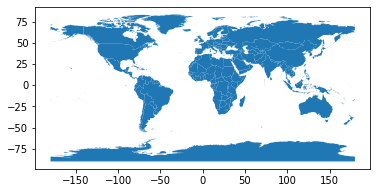

In [370]:
countries.plot()

In [371]:
countriesMerged = countries.merge(cleanLookup[cleanLookup['Province_State'].isnull()], left_on="ISO_A3", right_on="iso3", how="inner")

In [372]:
for country in countriesMerged.iso3:
    if country in list(cleanLookup.iso3):
        pass
    else:
        print(country)

In [373]:
# Export clean Countries

In [374]:
countriesCleaned = countriesMerged[['UID','geometry']]

<AxesSubplot:>

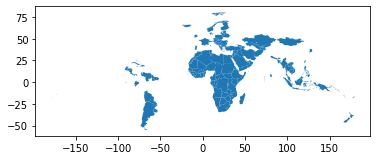

In [375]:
countriesCleaned.plot()

# Merge US States

In [376]:
states = gpd.read_file('./cb_2018_us_state_5m/cb_2018_us_state_5m.shp')
states['GEOID'] = states['GEOID'].astype('float64')

<AxesSubplot:>

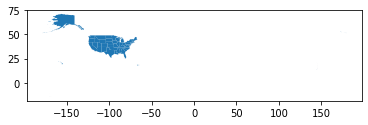

In [377]:
states.plot()

In [378]:
statesMerged = states.merge(cleanLookup[cleanLookup.FIPS<79], left_on="GEOID", right_on="FIPS", how="inner")

In [379]:
statesMerged.shape

(56, 22)

In [380]:
usStatesCleaned = statesMerged[['UID','geometry']]

# Countries with Regions:
    
'Belgium', 'Brazil', 'Chile', 'Colombia', 'Denmark', 'France',
   'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands',
   'Nigeria', 'Pakistan', 'Peru', 'Russia', 'Spain', 'Sweden',
   'Ukraine', 'United Kingdom', 'Australia', 'Canada', 'China'

In [381]:
countryList = ['Belgium', 'Brazil', 'Chile', 'Colombia',
   'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Netherlands',
   'Nigeria', 'Pakistan', 'Peru', 'Russia', 'Spain', 'Sweden',
   'Ukraine', 'United Kingdom', 'Australia', 'Canada', 'China']

adminGeoms = {
    'Belgium': {
       'Path': './countries_with_regions/BEL_adm/BEL_ADMIN_MERGED2.shp',
    },
    'Brazil': {
       'Path': './countries_with_regions/BRA_adm/BRA_adm1.shp',
    },
    'Chile': {
       'Path': './countries_with_regions/CHL_adm/CHL_adm1.shp',
    },
    'Colombia': {
       'Path': './countries_with_regions/COL_adm/COL_adm1.shp',
    },
#     'Denmark': { TERRITORIES
#        'Path': './countries_with_regions/BRA_adm/BRA_adm1.shp',
#     },
#     'France': { # TERRITORIES
#        'Path': './countries_with_regions/BRA_adm/BRA_adm1.shp',
#     },
    'Germany': {
       'Path': './countries_with_regions/DEU_adm/DEU_adm1.shp',
    },
    'India': {
       'Path': './countries_with_regions/IND_adm/IND_adm1.shp',
    },
    'Italy': {
       'Path': './countries_with_regions/ITA_adm/ITA_adm1.shp',
    },
    'Japan': {
       'Path': './countries_with_regions/JPN_adm/JPN_adm1.shp',
    },
    'Mexico': {
       'Path': './countries_with_regions/MEX_adm/MEX_adm1.shp',
    },
    'Netherlands': { # ALSO TERRITORIES :\
       'Path': './countries_with_regions/NLD_adm/NLD_adm1.shp',
    },
    'Nigeria': {
       'Path': './countries_with_regions/NGA_adm/NGA_adm1.shp',
    },
    'Pakistan': {
       'Path': './countries_with_regions/PAK_adm/PAK_adm1.shp',
    },
    'Peru': {
       'Path': './countries_with_regions/PER_adm/PER_adm1.shp',
    },
    'Russia': {
       'Path': './countries_with_regions/RUS_adm/RUS_adm1.shp',
    },
    'Spain': {
       'Path': './countries_with_regions/ESP_adm/ESP_adm1.shp',
    },
    'Sweden': {
       'Path': './countries_with_regions/SWE_adm/SWE_adm1.shp',
    },
    'Ukraine': {
       'Path': './countries_with_regions/UKR_adm/UKR_adm1.shp',
    },
    'United Kingdom': { # ALSO TERRITORIES :\
       'Path': './countries_with_regions/GBR_adm/GBR_adm1.shp',
    },
    'Australia': {
       'Path': './countries_with_regions/AUS_adm/AUS_adm1.shp',
    },
    'Canada': {
       'Path': './countries_with_regions/CAN_adm/CAN_adm1.shp',
    },
    'China': {
       'Path': './countries_with_regions/CHN_adm/CHN_adm1.shp',
    },
}

In [382]:
for country in countryList:
    currCountry = cleanLookup[(cleanLookup['Country_Region']==country)&(cleanLookup['Province_State']!='Unknown')]
    print(country)
    print(list(currCountry['Province_State']))

Belgium
['Antwerp', 'Brussels', 'East Flanders', 'Flemish Brabant', 'Hainaut', 'Liege', 'Limburg', 'Luxembourg', 'Namur', 'Walloon Brabant', 'West Flanders']
Brazil
['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara', 'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Para', 'Paraiba', 'Parana', 'Pernambuco', 'Piaui', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondonia', 'Roraima', 'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Tocantins']
Chile
['Antofagasta', 'Araucania', 'Arica y Parinacota', 'Atacama', 'Aysen', 'Biobio', 'Coquimbo', 'Los Lagos', 'Los Rios', 'Magallanes', 'Maule', 'Metropolitana', 'Nuble', 'OHiggins', 'Tarapaca', 'Valparaiso']
Colombia
['Amazonas', 'Antioquia', 'Arauca', 'Atlantico', 'Bolivar', 'Boyaca', 'Caldas', 'Capital District', 'Caqueta', 'Casanare', 'Cauca', 'Cesar', 'Choco', 'Cordoba', 'Cundinamarca', 'Guainia', 'Guaviare', 'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Narino'

In [383]:
for country in countryList:
    currCountry = cleanLookup[(cleanLookup['Country_Region']==country)&(cleanLookup['Province_State']!='Unknown')]
    scale = adminGeoms[country]['Path'].split('.shp')[0][-1:]
    geom = gpd.read_file(adminGeoms[country]['Path'])[[f'NAME_{scale}', f'VARNAME_{scale}', 'geometry']]

    geom.loc[geom[f'VARNAME_{scale}'].isnull(), f'VARNAME_{scale}'] = ''
    geom['RAW_NAME'] = geom[f'NAME_{scale}'] + geom[f'VARNAME_{scale}']
    geom = geom[geom['RAW_NAME'].notnull()]

    geom['RAW_NAME'] = geom['RAW_NAME'].str.lower().apply(lambda x: unidecode(x))
    
    dump = []
    
    
    for i in range(0, len(currCountry)):
        if country == "Brazil":
            tempName = currCountry.iloc[i].Province_State.lower()
        elif (country == 'Russia') or (country == 'Ukraine') or (country == "United Kingdom"):
            if 'city' in currCountry.iloc[i].Province_State.lower():
                tempName = currCountry.iloc[i].Province_State.lower()[:-1]
            elif 'moscow oblast' in currCountry.iloc[i].Province_State.lower():
                tempName = 'moskva'
            elif 'kiev oblast' in currCountry.iloc[i].Province_State.lower():
                tempName = 'kiev'
            elif 'kiev'in currCountry.iloc[i].Province_State.lower():
                tempName = 'kiev city'
            else:
                tempName = currCountry.iloc[i].Province_State.lower().split(' ')[0][:-1]
        else: 
            tempName = currCountry.iloc[i].Province_State.lower()[:-1]
            
        tempGeom = geom[geom['RAW_NAME'].str.contains(tempName)]
        if len(tempGeom) == 1:
            dump.append(tempGeom.iloc[0].geometry)
        else:
            try:
                dump.append(geom[geom[f'VARNAME_{scale}']==tempName].iloc[0].geometry)
            except:
                print(f"Error at {country}, {tempName}")
                dump.append(None)
    cleanGeom = gpd.GeoDataFrame(currCountry['UID'], geometry=dump)
    
    adminGeoms[country]['geom'] = cleanGeom

Error at Colombia, capital distric
Error at India, ladak
Error at Italy, p.a. bolzan
Error at Italy, p.a. trent
Error at Japan, port quarantin
Error at Netherlands, arub
Error at Netherlands, curaca
Error at Netherlands, sint maarte
Error at Netherlands, bonaire, sint eustatius and sab
Error at United Kingdom, bermud
Error at United Kingdom, britis
Error at United Kingdom, cayma
Error at United Kingdom, channe
Error at United Kingdom, falklan
Error at United Kingdom, gibralta
Error at United Kingdom, isl
Error at United Kingdom, montserra
Error at United Kingdom, turk
Error at United Kingdom, anguill
Error at Canada, diamond princes
Error at Canada, grand princes
Error at Canada, recovere
Error at China, hong kon
Error at China, maca


In [384]:
provinceGeom = pd.concat([adminGeoms[country]['geom'] for country in countryList])

# Merge it all, god help us

In [385]:
JHUGeomMerged = pd.concat([countriesCleaned, usStatesCleaned,provinceGeom])

In [386]:
JHUGeomMergedGdf = gpd.GeoDataFrame(JHUGeomMerged, geometry=JHUGeomMerged.geometry)

<AxesSubplot:>

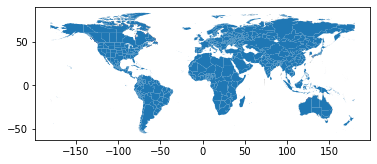

In [387]:
JHUGeomMergedGdf.plot()

In [388]:
JHUGeomMergedGdf.to_file("countries.geojson", driver='GeoJSON')